In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Educacion

In [ ]:
Educacion = pd.read_csv("../../Data/Education attainment in East Palo Alto.csv")

In [24]:
Educacion = Educacion[["Variable observation date","Variable properties name","Variable observation value"]].groupby(["Variable observation date","Variable properties name"]).sum().reset_index()

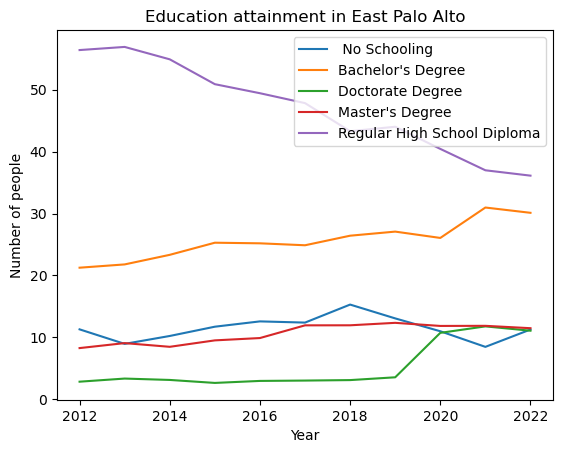

In [25]:
fig, ax = plt.subplots()
for educationtype in Educacion["Variable properties name"].unique():
    education = Educacion[Educacion["Variable properties name"]==educationtype]
    total_per_year = Educacion.groupby("Variable observation date")["Variable observation value"].sum()
    education = education.set_index("Variable observation date")
    education["Variable observation value"] = education["Variable observation value"] / total_per_year*100
    education = education.reset_index()
    ax.plot(education["Variable observation date"],education["Variable observation value"],
            label=educationtype.replace("Population With a ","").replace("Population Who Completed",""))
    ax.set_title("Education attainment in East Palo Alto")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of people")
plt.legend()
plt.show()

In [29]:
Educacion["Variable properties name"].unique()

array(['Population Who Completed No Schooling',
       "Population With a Bachelor's Degree",
       'Population With a Doctorate Degree',
       "Population With a Master's Degree",
       'Population With a Regular High School Diploma'], dtype=object)

In [33]:
HighEducation = Educacion[(Educacion["Variable properties name"] == "Population With a Bachelor's Degree") |
                           (Educacion["Variable properties name"] == "Population With a Doctorate Degree") |
                           (Educacion["Variable properties name"] == "Population With a Master's Degree")]

total_per_year = Educacion.groupby("Variable observation date")["Variable observation value"].sum()
HighEducation = HighEducation.set_index("Variable observation date")
HighEducation["Percentage"] = HighEducation["Variable observation value"] / total_per_year * 100
HighEducation = HighEducation.reset_index()
HighEducationPercentage = HighEducation.groupby("Variable observation date")["Percentage"].sum().reset_index()

In [ ]:
HighEducationPercentage.to_csv("HighlyEducated.csv",index=False)    

,Variable observation date,Percentage
0,2012,32.309069
1,2013,34.150120
2,2014,34.876929
3,2015,37.394270
4,2016,37.996569
5,2017,39.791508
6,2018,41.422107
7,2019,42.931419
8,2020,48.591234
9,2021,54.569862


In [27]:
Educacion.to_csv("EducacionPaloAltoYearType.csv",index=False)

#### Household income

In [5]:
Income =pd.read_csv("Median household income by race in East Palo Alto.csv")

In [6]:
Income =Income[['Variable observation date','Variable properties name','Variable observation value']].groupby(['Variable observation date','Variable properties name']).sum().reset_index()

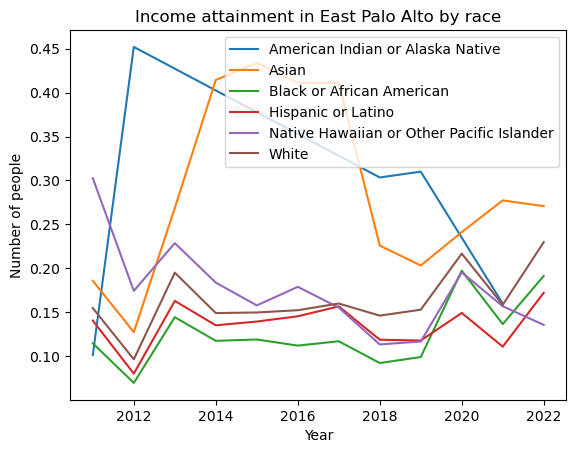

In [7]:
fig, ax = plt.subplots()
for incometype in Income["Variable properties name"].unique():
    income = Income[Income["Variable properties name"]==incometype]
    total_per_year = Income.groupby("Variable observation date")["Variable observation value"].sum()
    income = income.set_index("Variable observation date")
    income["Variable observation value"] = income["Variable observation value"] / total_per_year
    income = income.reset_index()
    ax.plot(income["Variable observation date"],income["Variable observation value"],
            label=incometype.replace("Median Income of ","").replace(" Households",""))
    ax.set_title("Income attainment in East Palo Alto by race")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of people")
plt.legend()
plt.show()

In [8]:
localsIncome = Income[(Income["Variable properties name"]=="Median Income of White Households") |
                         (Income["Variable properties name"]=="Median Income of Black or African American Households") | 
                         (Income["Variable properties name"]=="Median Income of American Indian or Alaska Native Households") |
                         (Income["Variable properties name"]=="Median Income of Native Hawaiian or Other Pacific Islander Households") ]

In [9]:
foreignersIncome = Income[(Income["Variable properties name"]=="Median Income of Asian Households") |
                          (Income["Variable properties name"]=="Median Income of Hispanic or Latino Households")]

In [10]:
localsIncome = localsIncome[["Variable observation date","Variable observation value"]].groupby("Variable observation date").sum()
foreignersIncome = foreignersIncome[["Variable observation date","Variable observation value"]].groupby("Variable observation date").sum()

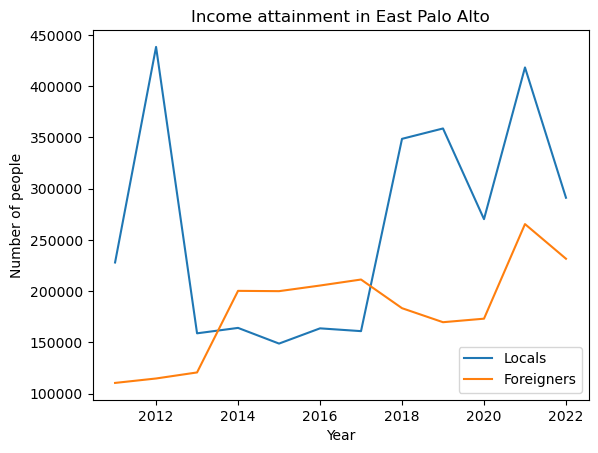

In [11]:
plt.plot(localsIncome.index,localsIncome["Variable observation value"],label="Locals")
plt.plot(foreignersIncome.index,foreignersIncome["Variable observation value"],label="Foreigners")
plt.title("Income attainment in East Palo Alto")
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.legend()
plt.show()

#### Employment

In [ ]:
job = pd.read_csv("../../Data/Number of people employed in East Palo Alto.csv")

In [13]:
job = job[["Variable observation date","Variable observation value"]] 


In [14]:
job["Year"] = job["Variable observation date"].apply(lambda x: int(x.split("-")[0]))
job["Month"] = job["Variable observation date"].apply(lambda x: int(x.split("-")[1]))
job.drop("Variable observation date",axis=1,inplace=True)

In [15]:
jobValues = job.groupby("Year")["Variable observation value"].sum()

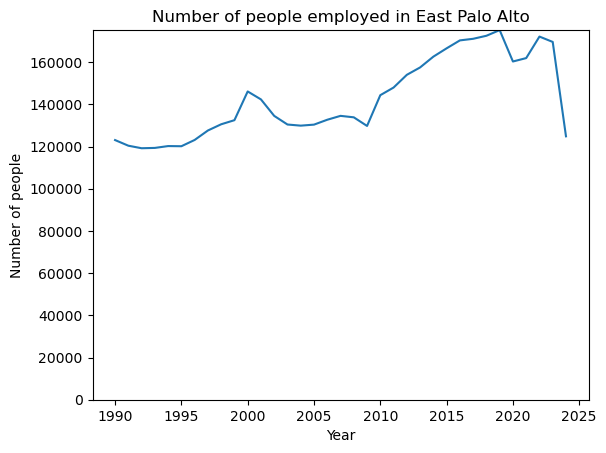

In [16]:
plt.plot(jobValues.index,jobValues)
plt.ylim(0,jobValues.max())
plt.title("Number of people employed in East Palo Alto")
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.show()

#### 